### Loading the dataset from the csv file

In [1]:
import pandas as pd

df = pd.read_csv("cleaned_lower_politifact.csv", ',')
X = df['text'].values
labels = df['label'].values

### Data Processing — convert to lower case and remove punctuation

In [2]:
# import re, string

# for i in range(X.size):
    
#     words = X[i].split()
#     filtered_list = []
#     for word in words:
#         pattern = re.compile('[^\u0000-\u007F]+', re.UNICODE)  #Remove all non-alphanumeric characters
        
#         word = pattern.sub('', word)
#         word = word.translate(str.maketrans('', '', string.punctuation))
#         word = word.lower()

#         filtered_list.append(word)
#         result = ' '.join(filtered_list)
        
#     X[i] = result      

# list1 = [['id', 'text', 'label']]
# for i in range(0, len(X)):
#       list1.append([df['id'][i], X[i], df['label'][i]])
# df1 = pd.DataFrame(list1)
# df1.to_csv('cleaned_lower_politifact.csv',sep=',',index = False ,header = False)

### Tokenize — Create Vocab to Int mapping dictionary

Ιn most of the NLP tasks, you will create an index mapping dictionary in such a way that your frequently occurring words are assigned lower indexes. One of the most common way of doing this is to use ```Counter``` method from ```Collections``` library.

In [29]:
from collections import Counter

words_list = []
articles_list = []
for i in range(X.size):
    
    articles_list.append(X[i])
    words = X[i].split()
    words_list.append(words)

flat_words_list = [item for sublist in words_list for item in sublist]
count_words = Counter(flat_words_list)

total_words = len(flat_words_list)
sorted_words = count_words.most_common(total_words)
#print(count_words)
#print(total_words)
#print(sorted_words)

In order to create a vocab to int mapping dictionary, you would simply do this

In [15]:
vocab_to_int = {w:i for i, (w,c) in enumerate(sorted_words)}

There is a small trick here, in this mapping index will start from 0 i.e. mapping of ‘the’ will be 0. But later on we are going to do padding for shorter reviews and conventional choice for padding is 0. So we need to start this indexing from 1

In [16]:
vocab_to_int = {w:i+1 for i, (w,c) in enumerate(sorted_words)}

### Tokenize — Encode the words

So far we have created a) list of reviews and b) index mapping dictionary using vocab from all our reviews. All this was to create an encoding of reviews (replace words in our reviews by integers)

In [33]:
articles_int = []
for aricle in articles_list:
    a = [vocab_to_int[w] for w in aricle.split()]
    articles_int.append(a)
print (articles_int[:2])

[[673, 13, 18, 10064, 759, 2, 36, 5, 335, 16, 26, 272, 8207, 1593, 1117, 127, 11, 129, 912, 63, 144, 138, 9000, 49, 496, 2429, 209, 120, 3, 1967, 419, 44, 2555, 2517, 11510, 72, 32, 364, 2, 2133, 3502, 513, 13815, 78, 8, 3144, 171, 4808, 61, 24, 154, 1, 92, 8, 6983, 331, 737, 3, 5, 5819, 726, 4, 441, 78, 13816, 2133, 4097, 2381, 10065, 2, 11511, 1, 172, 6156, 3, 1, 1854, 1930, 1477, 331, 737, 17, 5, 187, 4, 46, 7537, 166, 37, 5820, 1995, 4, 1665, 11512, 4, 1, 1246, 491, 13815, 11513, 18208, 18209, 48, 64, 44, 180, 60, 2517, 6, 1045, 5, 181, 43, 130, 28, 1665, 11512, 13, 51, 18, 2049, 27, 1259, 6, 15, 1478, 9001, 8, 1067, 2, 46, 6157, 1359, 4, 5, 147, 610, 619, 62, 7538, 1338, 4, 3812, 1125, 10066, 472, 1, 135, 18210, 35, 53, 3614, 1322, 37, 1593, 7, 1, 639, 4, 2049, 1, 6157, 1359, 2134, 42, 248, 344, 5821, 62, 993, 3, 43, 5526, 13817, 210, 1576, 6158, 117, 5, 13818, 1360, 394, 13, 8, 20, 5, 13819, 2024, 6, 86, 2518, 6158, 36, 32, 20, 46, 2024, 6, 24, 30, 7539, 2, 1, 1385, 3, 43, 659, 4

Note: what we have created now is a list of lists. Each individual review is a list of integer values and all of them are stored in one huge list

### Analyze Reviews Length

[261, 217, 784, 11714, 2237, 32, 126, 187, 1463, 900]


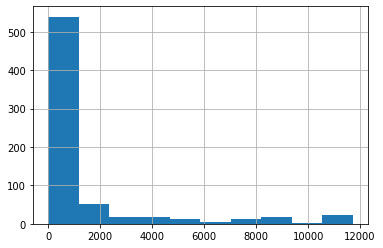

count      699.000000
mean      1537.991416
std       2677.192407
min         10.000000
25%        250.000000
50%        477.000000
75%       1059.000000
max      11714.000000
dtype: float64

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

articles_len = [len(x) for x in articles_int]
pd.Series(articles_len).hist()
plt.show()
pd.Series(articles_len).describe()

__Observations__ :

1. Mean article length = __1538__
2. Most of the articles are around 1000 words or more
3. There are quite a few articles that are extremely long, we can manually investigate them to check whether we need to include or exclude them from our analysis

### Removing Outliers — Getting rid of extremely long or short reviews

In [39]:
articles_int = [ articles_int[i] for i, l in enumerate(articles_len) if l<1100 ]
print(len(labels))

labels = [ labels[i] for i, l in enumerate(articles_len) if l<1100 ]
print(len(labels))

IndexError: list index out of range